In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D

__Задача:__ предсказание баллов ЕГЭ ученика в зависимости от кол-ва лет стажа его репетитора

In [2]:
X = np.array([[ 1,  1],
              [ 1,  1],
              [ 1,  2],
              [ 1,  5],
              [ 1,  3],
              [ 1,  0],
              [ 1,  5],
              [ 1, 10],
              [ 1,  1],
              [ 1,  2]])

In [3]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

In [4]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [52]:
n = X.shape[0]

eta = 1e-2
# изменил кол-во итераций
n_iter = 1000

W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {eta} \
       \nInitial weights = {W} \n')

for i in range(n_iter):
    y_pred = np.dot(X, W)
    err = calc_mse(y, y_pred)
    for k in range(W.shape[0]):
        W[k] -= eta * (1/n * 2 * X[:, k] @ (y_pred - y))
        
    # изменил условие изменения шага при больших значениях итераций    
    if (i % 10 == 0) & (i >= 290):
        eta /= 1.01
        print(f'Iteration #{i}: W_new = {W}, MSE = {round(err, 2)}, eta={eta:0.10f}')

Number of objects = 10        
Learning rate = 0.01        
Initial weights = [1.  0.5] 

Iteration #390: W_new = [43.89217756  4.02471993], MSE = 44.63, eta=0.0099009901
Iteration #400: W_new = [43.99366115  4.00631745], MSE = 44.52, eta=0.0098029605
Iteration #410: W_new = [44.08546366  3.98967048], MSE = 44.43, eta=0.0097059015
Iteration #420: W_new = [44.16858324  3.97459802], MSE = 44.35, eta=0.0096098034
Iteration #430: W_new = [44.2439081   3.96093902], MSE = 44.29, eta=0.0095146569
Iteration #440: W_new = [44.31222932  3.94855002], MSE = 44.24, eta=0.0094204524
Iteration #450: W_new = [44.37425214  3.93730314], MSE = 44.2, eta=0.0093271805
Iteration #460: W_new = [44.43060578  3.92708427], MSE = 44.16, eta=0.0092348322
Iteration #470: W_new = [44.48185221  3.91779152], MSE = 44.13, eta=0.0091433982
Iteration #480: W_new = [44.5284937   3.90933381], MSE = 44.11, eta=0.0090528695
Iteration #490: W_new = [44.5709796   3.90162965], MSE = 44.08, eta=0.0089632372
Iteration #500: W_ne

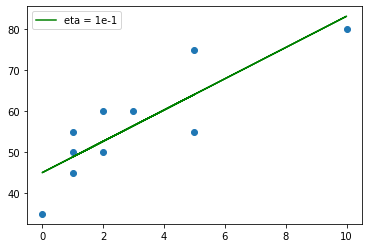

In [6]:
y_pred_3 = X @ W
plt.scatter(X[:, 1], y)
plt.plot(X[:, 1], y_pred, label='eta = 1e-1', c='g')
plt.legend()
plt.show()

2*. В этом коде мы избавляемся от итераций по весам, но тут есть ошибка, исправьте ее

In [42]:
n = X.shape[0]

eta = 1e-2 
n_iter = 1000

W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {eta} \
       \nInitial weights = {W} \n')

for i in range(n_iter):
    y_pred = np.dot(X, W)
    err = calc_mse(y, y_pred)
#     for k in range(W.shape[0]):
#         W[k] -= eta * (1/n * 2 * X[:, k] @ (y_pred - y))
    # ИЗМЕНЕНИЯ
#     W -= eta * (1/n * 2 * np.dot(X, y_pred - y))
    # ИЗМЕНЕНИЯ
    W -= eta * (1/n * 2 * np.dot(X.T, y_pred - y))
    #
    if i % 10 == 0:
        print(f'Iteration #{i}: W_new = {W}, MSE = {round(err,2)}')

Number of objects = 10        
Learning rate = 0.01        
Initial weights = [1.  0.5] 

Iteration #0: W_new = [2.08 4.27], MSE = 3047.75
Iteration #10: W_new = [ 7.0011236 10.6169007], MSE = 738.65
Iteration #20: W_new = [10.3486292  10.10603105], MSE = 622.03
Iteration #30: W_new = [13.38789582  9.55618391], MSE = 525.24
Iteration #40: W_new = [16.16088505  9.05336203], MSE = 444.66
Iteration #50: W_new = [18.69110735  8.59454545], MSE = 377.58
Iteration #60: W_new = [20.99981865  8.17589626], MSE = 321.72
Iteration #70: W_new = [23.10641138  7.79389815], MSE = 275.22
Iteration #80: W_new = [25.02858024  7.44534246], MSE = 236.5
Iteration #90: W_new = [26.78247081  7.12730145], MSE = 204.27
Iteration #100: W_new = [28.38281518  6.83710367], MSE = 177.43
Iteration #110: W_new = [29.84305573  6.57231156], MSE = 155.08
Iteration #120: W_new = [31.17545797  6.33070096], MSE = 136.48
Iteration #130: W_new = [32.39121367  6.11024241], MSE = 120.99
Iteration #140: W_new = [33.50053475  5.9

#### 3*. Вместо того, чтобы задавать количество итераций, задайте другое условие останова алгоритма - когда веса перестают изменяться меньше определенного порога  𝜖 .

In [8]:
n = X.shape[0]

eta = 1e-2
n_iter = 1000

w = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {eta} \
       \nInitial weights = {w} \n')

# критерий останова (разница весов, при которой алгоритм останавливается)
min_weight_dist = 1e-6

# зададим начальную разницу весов большим числом
weight_dist = np.inf

# подсчёт итераций
i = 0

while weight_dist > min_weight_dist:
    y_pred = np.dot(X, w)
    err = calc_mse(y, y_pred)
    new_w = w.copy()
    for k in range(w.shape[0]):
        w[k] -= eta * (1/n * 2 * X[:, k] @ (y_pred - y))
    if (i % 100 == 0) | (i >= 1000):
        eta /= 1.001
        print(f'Iteration #{i}: w_new = {w}, MSE = {round(err, 2)}, eta={eta:0.10f}')
    weight_dist = np.linalg.norm(new_w - w, ord=2)
    i+=1


Number of objects = 10        
Learning rate = 0.01        
Initial weights = [1.  0.5] 

Iteration #0: w_new = [2.08 4.27], MSE = 3047.75, eta=0.0099900100
Iteration #100: w_new = [28.36747178  6.83988596], MSE = 177.67, eta=0.0099800300
Iteration #200: w_new = [38.37143976  5.02582061], MSE = 65.44, eta=0.0099700599
Iteration #300: w_new = [42.37838429  4.299223  ], MSE = 47.42, eta=0.0099600998
Iteration #400: w_new = [43.98478075  4.00792777], MSE = 44.53, eta=0.0099501497
Iteration #500: w_new = [44.62938048  3.89103955], MSE = 44.06, eta=0.0099402094
Iteration #600: w_new = [44.88827632  3.84409278], MSE = 43.98, eta=0.0099302792
Iteration #700: w_new = [44.9923539   3.82521991], MSE = 43.97, eta=0.0099203588
Iteration #800: w_new = [45.03423192  3.81762598], MSE = 43.97, eta=0.0099104484
Iteration #900: w_new = [45.05109789  3.8145676 ], MSE = 43.97, eta=0.0099005478
Iteration #1000: w_new = [45.05789669  3.81333474], MSE = 43.97, eta=0.0098906571
Iteration #1001: w_new = [45.05

Iteration #1095: w_new = [45.06047549  3.81286711], MSE = 43.97, eta=0.0089947229
Iteration #1096: w_new = [45.0604921  3.8128641], MSE = 43.97, eta=0.0089857371
Iteration #1097: w_new = [45.06050855  3.81286112], MSE = 43.97, eta=0.0089767604
Iteration #1098: w_new = [45.06052485  3.81285816], MSE = 43.97, eta=0.0089677926
Iteration #1099: w_new = [45.06054101  3.81285523], MSE = 43.97, eta=0.0089588337
Iteration #1100: w_new = [45.06055701  3.81285233], MSE = 43.97, eta=0.0089498839
Iteration #1101: w_new = [45.06057287  3.81284945], MSE = 43.97, eta=0.0089409429
Iteration #1102: w_new = [45.06058859  3.81284661], MSE = 43.97, eta=0.0089320109
Iteration #1103: w_new = [45.06060416  3.81284378], MSE = 43.97, eta=0.0089230878
Iteration #1104: w_new = [45.06061958  3.81284098], MSE = 43.97, eta=0.0089141736
Iteration #1105: w_new = [45.06063487  3.81283821], MSE = 43.97, eta=0.0089052684
Iteration #1106: w_new = [45.06065002  3.81283547], MSE = 43.97, eta=0.0088963720
Iteration #1107: w

Iteration #1395: w_new = [45.0622606   3.81254341], MSE = 43.97, eta=0.0066644535
Iteration #1396: w_new = [45.06226206  3.81254315], MSE = 43.97, eta=0.0066577957
Iteration #1397: w_new = [45.0622635   3.81254289], MSE = 43.97, eta=0.0066511446
Iteration #1398: w_new = [45.06226493  3.81254263], MSE = 43.97, eta=0.0066445001
Iteration #1399: w_new = [45.06226636  3.81254237], MSE = 43.97, eta=0.0066378622
Iteration #1400: w_new = [45.06226777  3.81254211], MSE = 43.97, eta=0.0066312310
Iteration #1401: w_new = [45.06226918  3.81254186], MSE = 43.97, eta=0.0066246064
Iteration #1402: w_new = [45.06227057  3.8125416 ], MSE = 43.97, eta=0.0066179884
Iteration #1403: w_new = [45.06227196  3.81254135], MSE = 43.97, eta=0.0066113770
Iteration #1404: w_new = [45.06227333  3.8125411 ], MSE = 43.97, eta=0.0066047722
Iteration #1405: w_new = [45.0622747   3.81254086], MSE = 43.97, eta=0.0065981741
Iteration #1406: w_new = [45.06227605  3.81254061], MSE = 43.97, eta=0.0065915825
Iteration #1407:

#### Для второй задачи ещё два вариант записи:

In [9]:
n = X.shape[0]

eta = 1e-2 
n_iter = 1000

W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {eta} \
       \nInitial weights = {W} \n')

for i in range(n_iter):
    y_pred = np.dot(X, W)
    err = calc_mse(y, y_pred)
#     for k in range(W.shape[0]):
#         W[k] -= eta * (1/n * 2 * X[:, k] @ (y_pred - y))
    # ИЗМЕНЕНИЯ
#     W -= eta * (1/n * 2 * np.dot(X, y_pred - y))
    # ИЗМЕНЕНИЯ
    W[0] -= eta * (1/n * 2 * np.dot(X[:, 0], y_pred - y))
    W[1] -= eta * (1/n * 2 * np.dot(X[:, 1], y_pred - y))
    #
    if i % 10 == 0:
        print(f'Iteration #{i}: W_new = {W}, MSE = {round(err,2)}')

Number of objects = 10        
Learning rate = 0.01        
Initial weights = [1.  0.5] 

Iteration #0: W_new = [2.08 4.27], MSE = 3047.75
Iteration #10: W_new = [ 7.0011236 10.6169007], MSE = 738.65
Iteration #20: W_new = [10.3486292  10.10603105], MSE = 622.03
Iteration #30: W_new = [13.38789582  9.55618391], MSE = 525.24
Iteration #40: W_new = [16.16088505  9.05336203], MSE = 444.66
Iteration #50: W_new = [18.69110735  8.59454545], MSE = 377.58
Iteration #60: W_new = [20.99981865  8.17589626], MSE = 321.72
Iteration #70: W_new = [23.10641138  7.79389815], MSE = 275.22
Iteration #80: W_new = [25.02858024  7.44534246], MSE = 236.5
Iteration #90: W_new = [26.78247081  7.12730145], MSE = 204.27
Iteration #100: W_new = [28.38281518  6.83710367], MSE = 177.43
Iteration #110: W_new = [29.84305573  6.57231156], MSE = 155.08
Iteration #120: W_new = [31.17545797  6.33070096], MSE = 136.48
Iteration #130: W_new = [32.39121367  6.11024241], MSE = 120.99
Iteration #140: W_new = [33.50053475  5.9

#### второй вариант

In [41]:
n = X.shape[0]

eta = 1e-2 
n_iter = 1500

W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {eta} \
       \nInitial weights = {W} \n')

for i in range(n_iter):
    y_pred = np.dot(X, W)
    err = calc_mse(y, y_pred)
#     for k in range(W.shape[0]):
#         W[k] -= eta * (1/n * 2 * X[:, k] @ (y_pred - y))
    # ИЗМЕНЕНИЯ приводящие к ошибке
#     W -= eta * (1/n * 2 * np.dot(X, y_pred - y))
    # ИЗМЕНЕНИЯ необходимые
    W -= eta * (1/n * 2 * (X.T @ (y_pred - y)))
    #
    if i % 10 == 0:
        print(f'Iteration #{i}: W_new = {W}, MSE = {round(err,2)}')    

Number of objects = 10        
Learning rate = 0.01        
Initial weights = [1.  0.5] 

Iteration #0: W_new = [2.08 4.27], MSE = 3047.75
Iteration #10: W_new = [ 7.0011236 10.6169007], MSE = 738.65
Iteration #20: W_new = [10.3486292  10.10603105], MSE = 622.03
Iteration #30: W_new = [13.38789582  9.55618391], MSE = 525.24
Iteration #40: W_new = [16.16088505  9.05336203], MSE = 444.66
Iteration #50: W_new = [18.69110735  8.59454545], MSE = 377.58
Iteration #60: W_new = [20.99981865  8.17589626], MSE = 321.72
Iteration #70: W_new = [23.10641138  7.79389815], MSE = 275.22
Iteration #80: W_new = [25.02858024  7.44534246], MSE = 236.5
Iteration #90: W_new = [26.78247081  7.12730145], MSE = 204.27
Iteration #100: W_new = [28.38281518  6.83710367], MSE = 177.43
Iteration #110: W_new = [29.84305573  6.57231156], MSE = 155.08
Iteration #120: W_new = [31.17545797  6.33070096], MSE = 136.48
Iteration #130: W_new = [32.39121367  6.11024241], MSE = 120.99
Iteration #140: W_new = [33.50053475  5.9